In [1]:
# Here is imports for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
import re
import warnings
warnings.filterwarnings("ignore")

<h3>Insights into the Dataframe</h3>

In [2]:
# Save the data into a dataframe
df = pd.read_csv("laptopData.csv")

In [3]:
# Show the head of the dataframe (first 5 rows)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# Show the tail of the dataframe (last 5 rows)
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


There are 1303 rows in total

In [5]:
# Describe the dataframe
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [6]:
# Show data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [7]:
# Get the name of all the columns (already in the df.info but this we can get when needed)
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [8]:
# Get the shape of the dataframe (rows and columns)
df.shape

(1303, 12)

In [9]:
# Create a for loop to go through each column and all the value counts, this way it's easier to see ->
# all the value_counts for each column without necessaryly printing each separately-
for i in df.columns:
    x = df[i].value_counts()
    print(f"Column: {x}")

Column: Unnamed: 0
1302.0    1
0.0       1
1.0       1
2.0       1
3.0       1
         ..
13.0      1
12.0      1
11.0      1
10.0      1
9.0       1
Name: count, Length: 1273, dtype: int64
Column: Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
Column: TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
Column: Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
10.1      3
35.6      3
13        2
24        2
18.4      1
27.3      1
25.6      1
33

<h3>Dataset Cleaning</h3>

In [10]:
# Check for null/missing values within the dataframe
null_df = df[df.isna().any(axis=1)]

# Display the null dataframe
null_df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since all the values on the rows are NaN, and there are only 30 rows from 1303, these can be dropped

In [11]:
# Drop the missing values
df = df.dropna(axis=0, how="any")

# Reset the index of the dataframe after dropping rows containing NaN values
df = df.reset_index(drop=True)

# Display the dataframe
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [12]:
# Check that all NaN values were deleted from the dataframe 
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

30 rows with missing values were deleted without complications

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Display the duplicates within the dataframe in a new dataframe created for duplicates
duplicated_df = df[df.duplicated(keep=False)]

# Display the duplicated dataframe
duplicated_df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [15]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
1302.0    1
0.0       1
1.0       1
2.0       1
3.0       1
         ..
13.0      1
12.0      1
11.0      1
10.0      1
9.0       1
Name: count, Length: 1273, dtype: int64

This seems to be a index variable, we can delete this since we already have index from pandas library. This is done for dataset cleaning and also that it doesn't confuse later on.

In [16]:
# Remove Unnamed: 0 column if it exists to avoid confusion and we don't need other index columns, since we have pandas
df = df.drop(columns=["Unnamed: 0"], axis=0)

In [17]:
# Display the changed made to the dataframe
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [18]:
# Identify rows where either 'Memory' or 'Inches' column has a '?'
mask = (df['Memory'] == '?') | (df['Inches'] == '?') | (df['Weight'] == '?')

# Drop those rows
df = df[~mask]


<h2>Optimization for basic visualization</h2>

In [19]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [20]:
# Split Memory into two parts if there are multiple storage types
df[["Primary_Storage", "Secondary_Storage"]] = df["Memory"].str.split(" \+ ", expand=True, n=1)

# Display the Primary_Storage value counts to see all the different primary storage types
df['Primary_Storage'].value_counts()

Primary_Storage
256GB SSD              485
1TB HDD                218
128GB SSD              168
512GB SSD              136
500GB HDD              130
32GB Flash Storage      37
2TB HDD                 16
64GB Flash Storage      15
1TB SSD                 15
1.0TB Hybrid             9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
128GB Flash Storage      4
180GB SSD                4
16GB SSD                 3
512GB Flash Storage      2
64GB SSD                 1
32GB HDD                 1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
1.0TB HDD                1
Name: count, dtype: int64

In [21]:
# Display the secondary storage value counts 
df['Secondary_Storage'].value_counts()

Secondary_Storage
1TB HDD         181
2TB HDD          15
256GB SSD         3
500GB HDD         2
1.0TB Hybrid      2
512GB SSD         1
Name: count, dtype: int64

In [22]:
# Function to check if storage contains TB or GB and convert size accordingly
def convert_storage_to_gb(storage):
    if pd.notna(storage):  # Ensure storage is not NaN
        if "TB" in storage:
            size = float(storage.split("TB")[0].strip()) * 1024  # Convert TB to GB
            return size
        elif "GB" in storage:
            size = float(storage.split("GB")[0].strip())  # Keep GB as is
            return size
    return float(0.0) # Default for missing values

# Apply conversion to Primary and Secondary Storage
df["Primary_Size(GB)"] = df["Primary_Storage"].apply(convert_storage_to_gb)
df["Secondary_Size(GB)"] = df["Secondary_Storage"].apply(convert_storage_to_gb)

In [23]:
# Now that we have different column for Primary and Secondary Storage size, we can get the storage type
df['Primary_Storage'] = df['Primary_Storage'].apply(lambda x: re.sub(r'[\d\.]+(?:GB|TB)?\s*', '', str(x)).strip())
df['Secondary_Storage'] = df['Secondary_Storage'].apply(lambda x: re.sub(r'[\d\.]+(?:GB|TB)?\s*', '', str(x)).strip())

Let's fill them with no secondary storage

In [24]:
df['Secondary_Storage'] = df['Secondary_Storage'].fillna('No Secondary Storage')

In [25]:
# Display the updated dataframe with new memorytype columns
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,SSD,None,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,SSD,None,128.0,0.0
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,SSD,None,512.0,0.0
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Flash Storage,None,64.0,0.0
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,HDD,None,1024.0,0.0


In [26]:
# Split ScreenResolution into Width, Height, and Panel type
df[['Resolution_Width', 'Resolution_Height']] = df['ScreenResolution'].str.extract(r'(\d{3,5})x(\d{3,5})').astype(float)
df['Panel_type'] = df['ScreenResolution'].str.replace(r'\d{3,5}x\d{3,5}', '', regex=True).str.strip()

# Fill Colums with NaN or otherwise odd values in 'Panel_type' with 'Not Specified'
df['Panel_type'] = df['Panel_type'].replace(r'^\s*$', 'Not Specified', regex=True)

In [27]:
# Display the head of the dataframe
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Resolution_Width,Resolution_Height,Panel_type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,SSD,None,128.0,0.0,2560.0,1600.0,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Flash Storage,None,128.0,0.0,1440.0,900.0,Not Specified
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,SSD,None,256.0,0.0,1920.0,1080.0,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,SSD,None,512.0,0.0,2880.0,1800.0,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,SSD,None,256.0,0.0,2560.0,1600.0,IPS Panel Retina Display


In [28]:
# Get Panel_type value counts to see all the different values within the Panel_type column
df['Panel_type'].value_counts()

Panel_type
Full HD                                492
Not Specified                          307
IPS Panel Full HD                      231
IPS Panel Full HD / Touchscreen         52
Full HD / Touchscreen                   45
Touchscreen                             31
IPS Panel Retina Display                17
Quad HD+ / Touchscreen                  14
IPS Panel 4K Ultra HD                   12
IPS Panel Touchscreen                   12
IPS Panel 4K Ultra HD / Touchscreen     11
IPS Panel                               11
4K Ultra HD / Touchscreen                9
4K Ultra HD                              7
IPS Panel Quad HD+ / Touchscreen         6
IPS Panel Quad HD+                       5
Quad HD+                                 3
IPS Panel Touchscreen / 4K Ultra HD      2
Touchscreen / Quad HD+                   1
Touchscreen / Full HD                    1
Touchscreen / 4K Ultra HD                1
Name: count, dtype: int64

In [29]:
# Extract CPU Brand such as Intel or AMD
df['CPU_Brand'] = df['Cpu'].str.extract(r'^(Intel|AMD)', expand=False)

# Extract CPU Model such as Core i5 or Ryzen 5
df['CPU_Model'] = df['Cpu'].str.extract(r'^(?:Intel|AMD)\s+(.+?)\s+\d*\.*\d*GHz', expand=False)

# Extract CPU Frequency in GHz
df['CPU_Frequency(GHz)'] = df['Cpu'].str.extract(r'(\d+\.\d+)GHz', expand=False).astype(float)

# Extract GPU Brand (e.g., Intel, AMD, Nvidia)
df['Gpu_Brand'] = df['Gpu'].str.split().str[0]

# Extract GPU model
df['Gpu_Model'] = df['Gpu'].str.replace(r'^\w+\s+', '', regex=True)

# Fill missing values within df['CPU_Frequency(GHz)']
df['CPU_Frequency(GHz)'] = df['CPU_Frequency(GHz)'].fillna(df['CPU_Frequency(GHz)'].mean())

# Fill missing values within df['CPU_Frequency(GHz)']
df['Gpu_Model'] = df['Gpu_Model'].fillna('Not Known')

# Extract GPU Brand (e.g., Intel, AMD, Nvidia)
df['Gpu_Brand'] = df['Gpu_Brand'].fillna('Not Known')

In [30]:
# Drop the 'Primary_Storage' column to avoid confusion
df = df.drop(columns=['Memory', 'ScreenResolution', 'Gpu', 'Cpu'], axis=1)

# Rename 'Inches' column to 'ScreenSize' for clarity
df.rename(columns={'Inches': 'ScreenSize'}, inplace=True)


In [31]:
# Extract numeric values before converting to float
df["Weight"] = df["Weight"].str.extract(r"(\d+\.?\d*)").astype(float)
df["Ram"] = df["Ram"].str.extract(r"(\d+)").astype(float)
df["ScreenSize"] = df["ScreenSize"].str.extract(r"(\d+)").astype(float)

In [32]:
# Display the dataframe to see all the changes made
df

,Company,TypeName,ScreenSize,Ram,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),Secondary_Size(GB),Resolution_Width,Resolution_Height,Panel_type,CPU_Brand,CPU_Model,CPU_Frequency(GHz),Gpu_Brand,Gpu_Model
0,Apple,Ultrabook,13.0,8.0,macOS,1.37,71378.6832,SSD,None,128.0,0.0,2560.0,1600.0,IPS Panel Retina Display,Intel,Core i5,2.3,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.0,8.0,macOS,1.34,47895.5232,Flash Storage,None,128.0,0.0,1440.0,900.0,Not Specified,Intel,Core i5,1.8,Intel,HD Graphics 6000
2,HP,Notebook,15.0,8.0,No OS,1.86,30636.0000,SSD,None,256.0,0.0,1920.0,1080.0,Full HD,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620
3,Apple,Ultrabook,15.0,16.0,macOS,1.83,135195.3360,SSD,None,512.0,0.0,2880.0,1800.0,IPS Panel Retina Display,Intel,Core i7,2.7,AMD,Radeon Pro 455
4,Apple,Ultrabook,13.0,8.0,macOS,1.37,96095.8080,SSD,None,256.0,0.0,2560.0,1600.0,IPS Panel Retina Display,Intel,Core i5,3.1,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,4.0,Windows 10,1.80,33992.6400,SSD,None,128.0,0.0,1920.0,1080.0,IPS Panel Full HD / Touchscreen,Intel,Core i7 6500U,2.5,Intel,HD Graphics 520
1269,Lenovo,2 in 1 Convertible,13.0,16.0,Windows 10,1.30,79866.7200,SSD,None,512.0,0.0,3200.0,1800.0,IPS Panel Quad HD+ / Touchscreen,Intel,Core i7 6500U,2.5,Intel,HD Graphics 520
1270,Lenovo,Notebook,14.0,2.0,Windows 10,1.50,12201.1200,Flash Storage,None,64.0,0.0,1366.0,768.0,Not Specified,Intel,Celeron Dual Core N3050,1.6,Intel,HD Graphics
1271,HP,Notebook,15.0,6.0,Windows 10,2.19,40705.9200,HDD,None,1024.0,0.0,1366.0,768.0,Not Specified,Intel,Core i7 6500U,2.5,AMD,Radeon R5 M330


<h3>Basic Visualization</h3>

<Axes: >

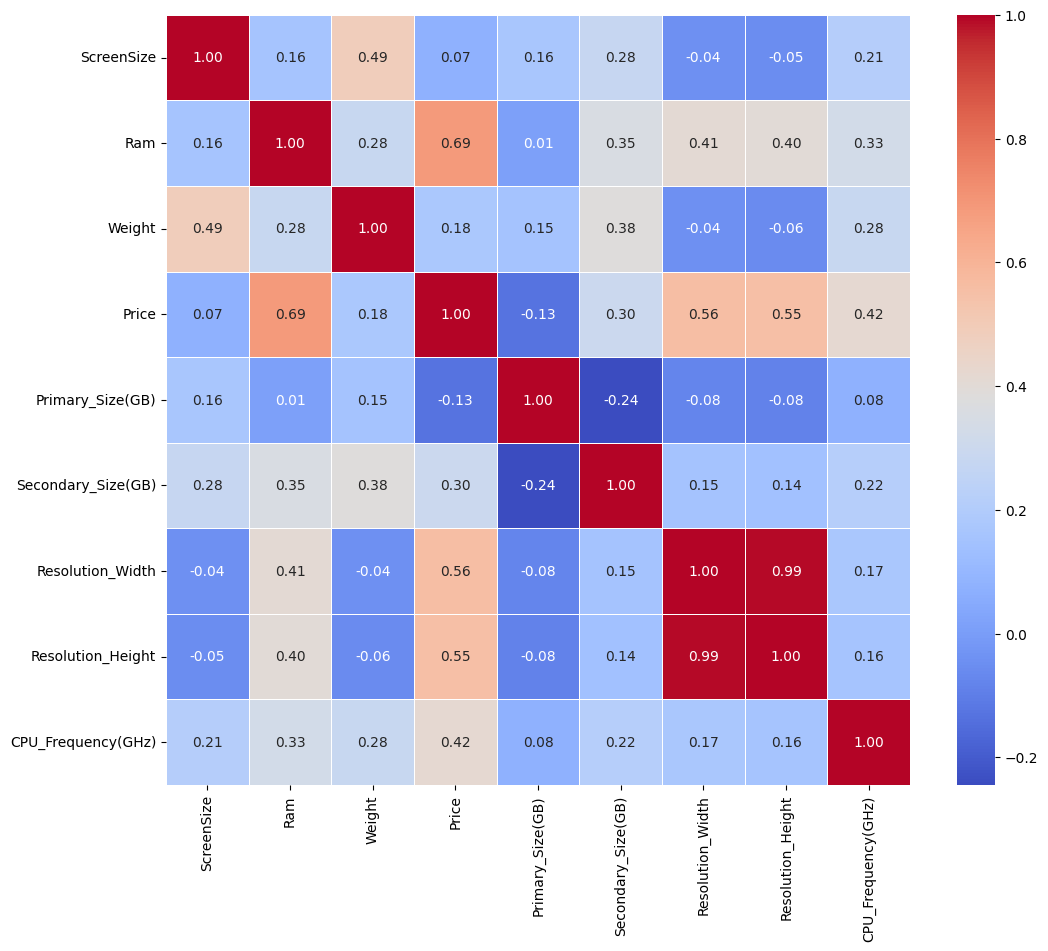

In [33]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

Nothing seems to have a really high correlation to price except Ram seems to have noticable correlation otherwise all others seem quite low.
Weight and Resolution_Width and Resolution_Height seem to have next most noticable correlation

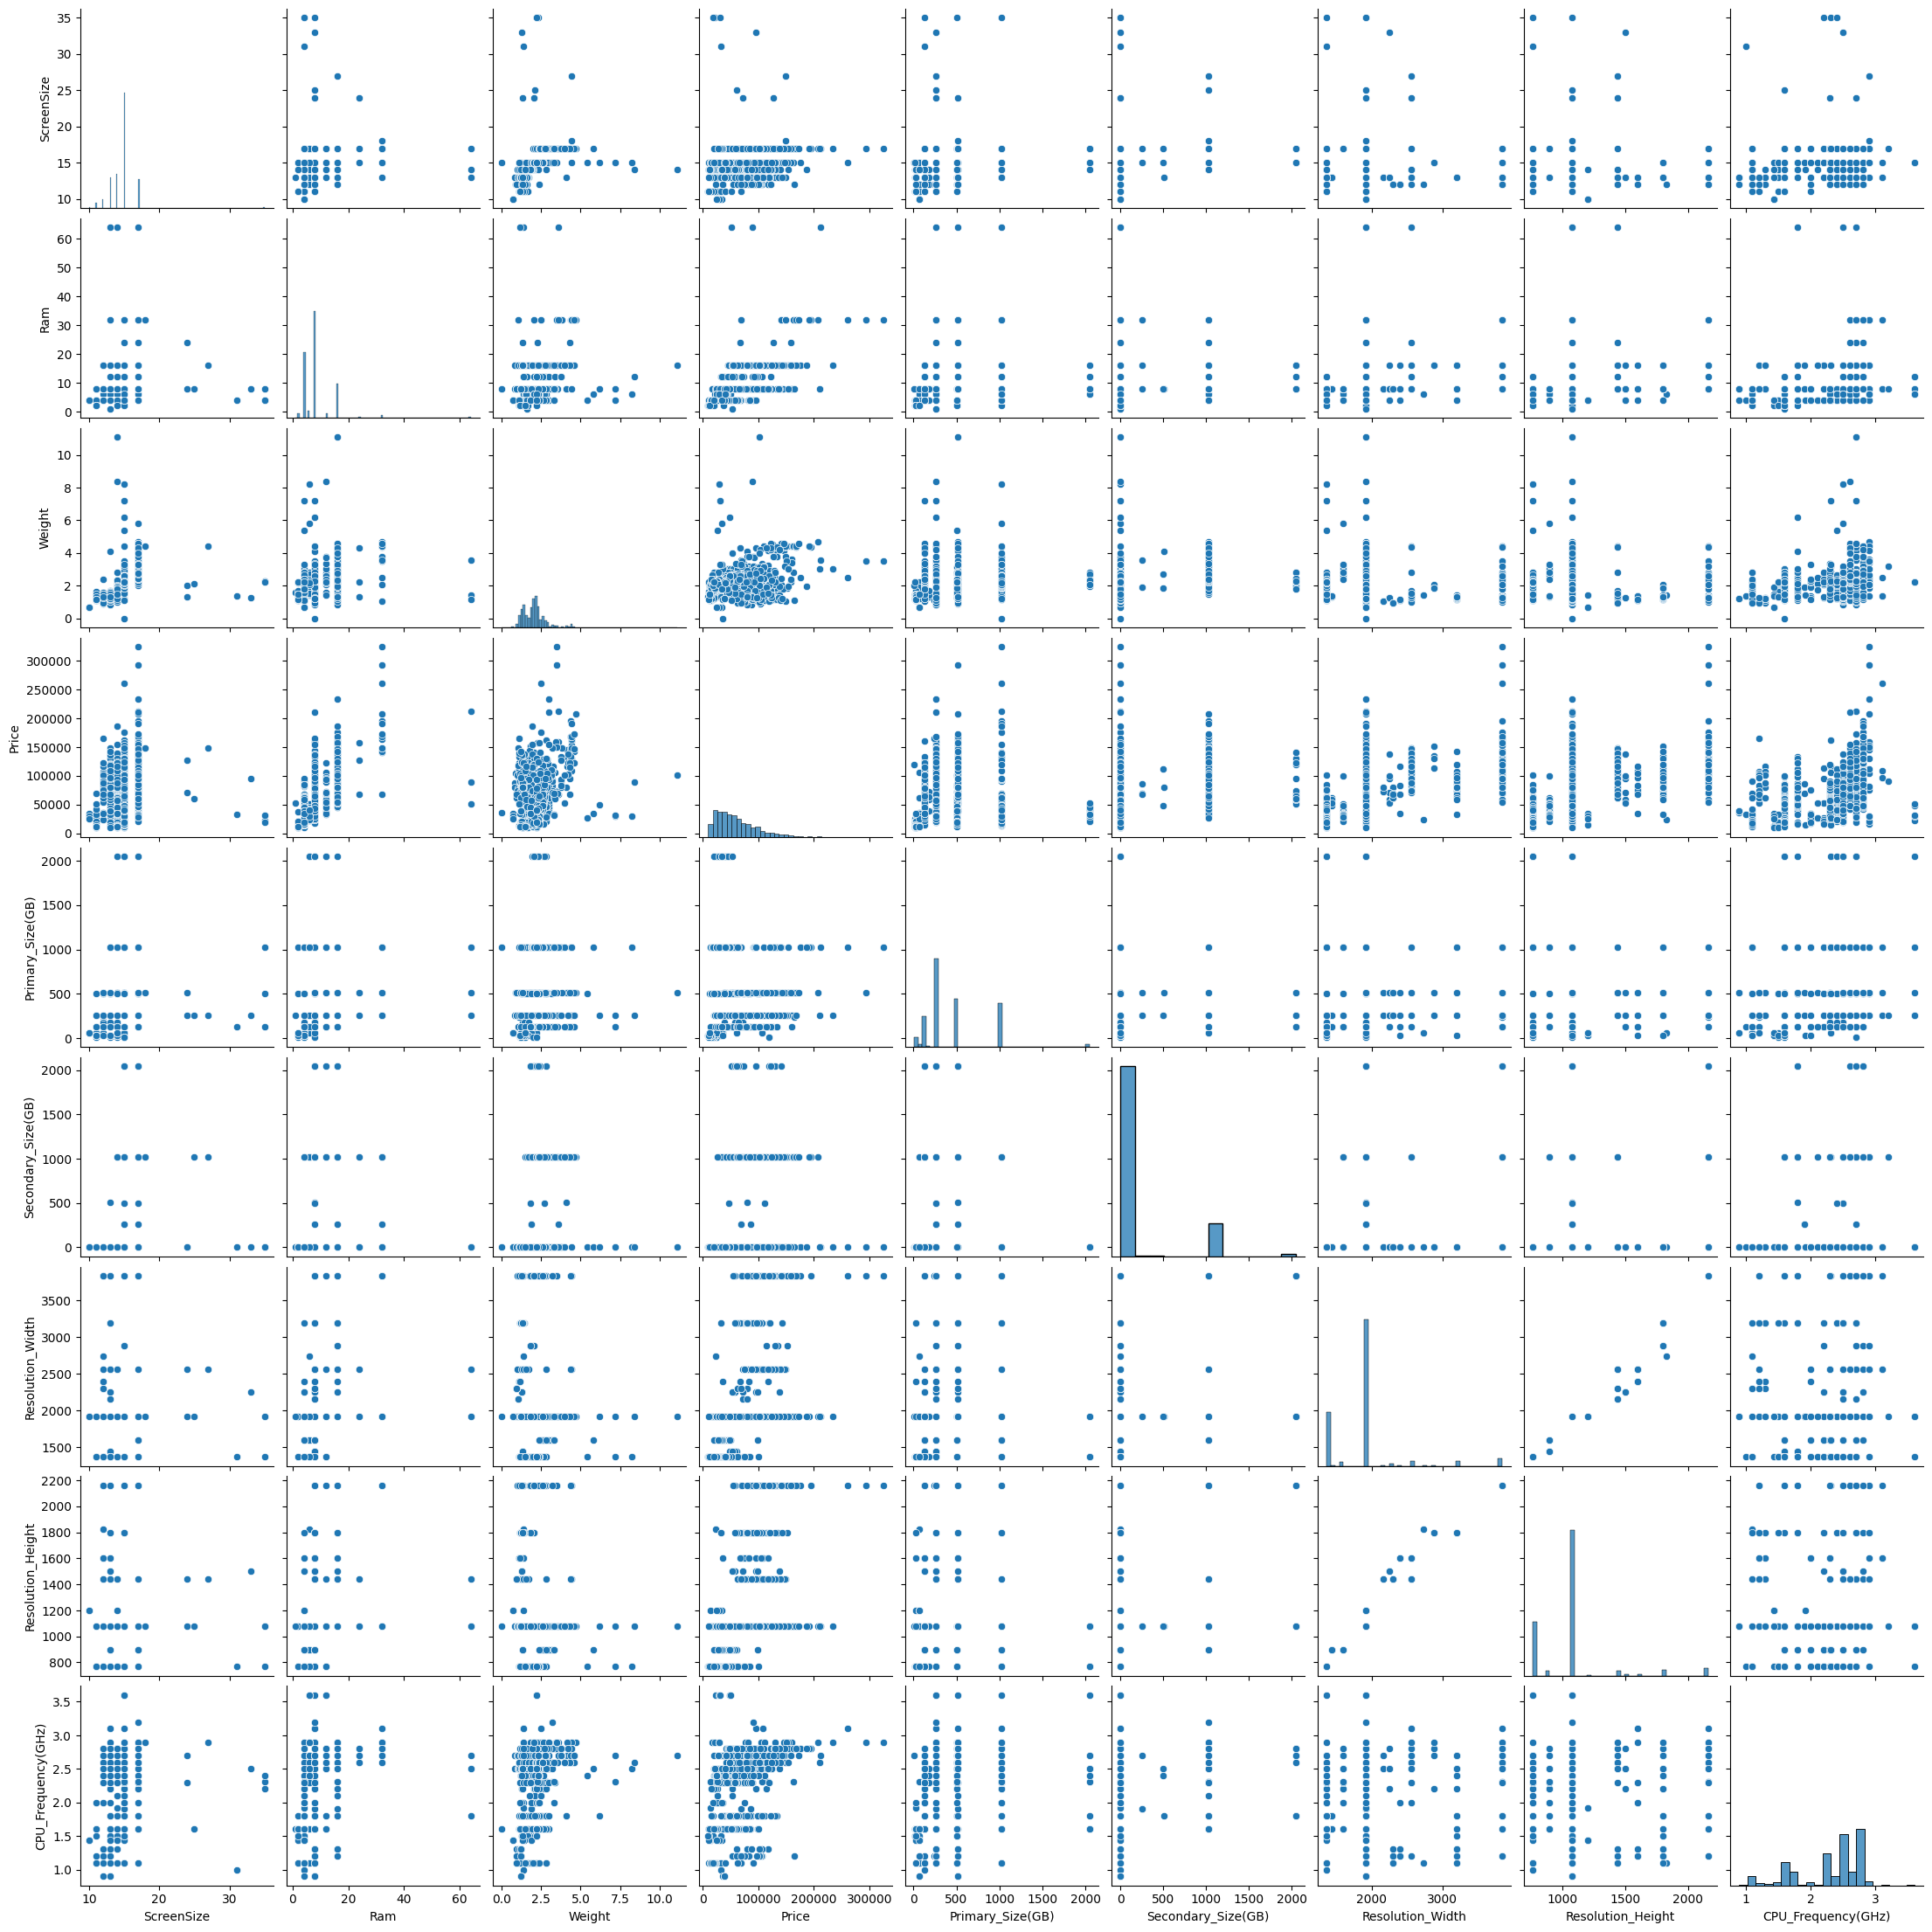

In [34]:
# pair plot to see everything at once
sns.pairplot(df_numeric)

# Nothing seems to correlate that well with price, this could be because of companies brand value or other possible factors like model name excetra

CPU frequency, Resolution_Width, Resolution_Height and maybe weight also seems to have some noticable correlation to price

In [35]:
"""# Create helper columns that are not directly
# connected to price but can help in the analysis
df['Ram_to_Weight'] = round(df['Ram'] / df['Weight'], 1)
df['Primary_Size(GB)_to_Weight'] = round(df['Primary_Size(GB)'] / df['Weight'], 1)
df['Cpu Frequency(GHz)_to_Weight'] =  round(df['Weight'] / df['CPU_Frequency(GHz)'], 1)
df['Cpu Frequency(GHz)_to_Weight'] =  round(df['CPU_Frequency(GHz)'] / df['Weight'], 1)
df['ScreenSize_to_Weight'] = round(df['ScreenSize'] / df['Weight'], 1)
df['Ram_to_ScreenSize'] = round(df['ScreenSize'] / df['Ram'], 1)
df['Ram_to_CPU_Frequency'] = round(df['CPU_Frequency(GHz)'] / df['Ram'], 1)
df['Primary_Storage(GB)_to_CPU_Frequency(GHz)'] = round(df['Primary_Size(GB)'] / df['CPU_Frequency(GHz)'], 1)
df['Primary_Size(GB)_to_Resolution_Width'] = round(df['Primary_Size(GB)'] / df['Resolution_Width'], 1)
df['Primary_Size(GB)_to_Resolution_Height'] = round(df['Primary_Size(GB)'] / df['Resolution_Height'], 1)"""

cols = [
    'Ram',
    'Weight',
    'Primary_Size(GB)',
    'CPU_Frequency(GHz)',
    'ScreenSize',
    'Resolution_Width',
    'Resolution_Height'
]

helper_columns = []

for numerator in cols:
    for denominator in cols:
        if numerator != denominator:
            new_col_name = f"{numerator}_to_{denominator}"
            df[new_col_name] = (df[numerator] / df[denominator]).round(1)
            helper_columns.append(new_col_name)

df[helper_columns] = df[helper_columns].dropna(axis=1, how='all')  # Drop columns with all NaN values

<Axes: >

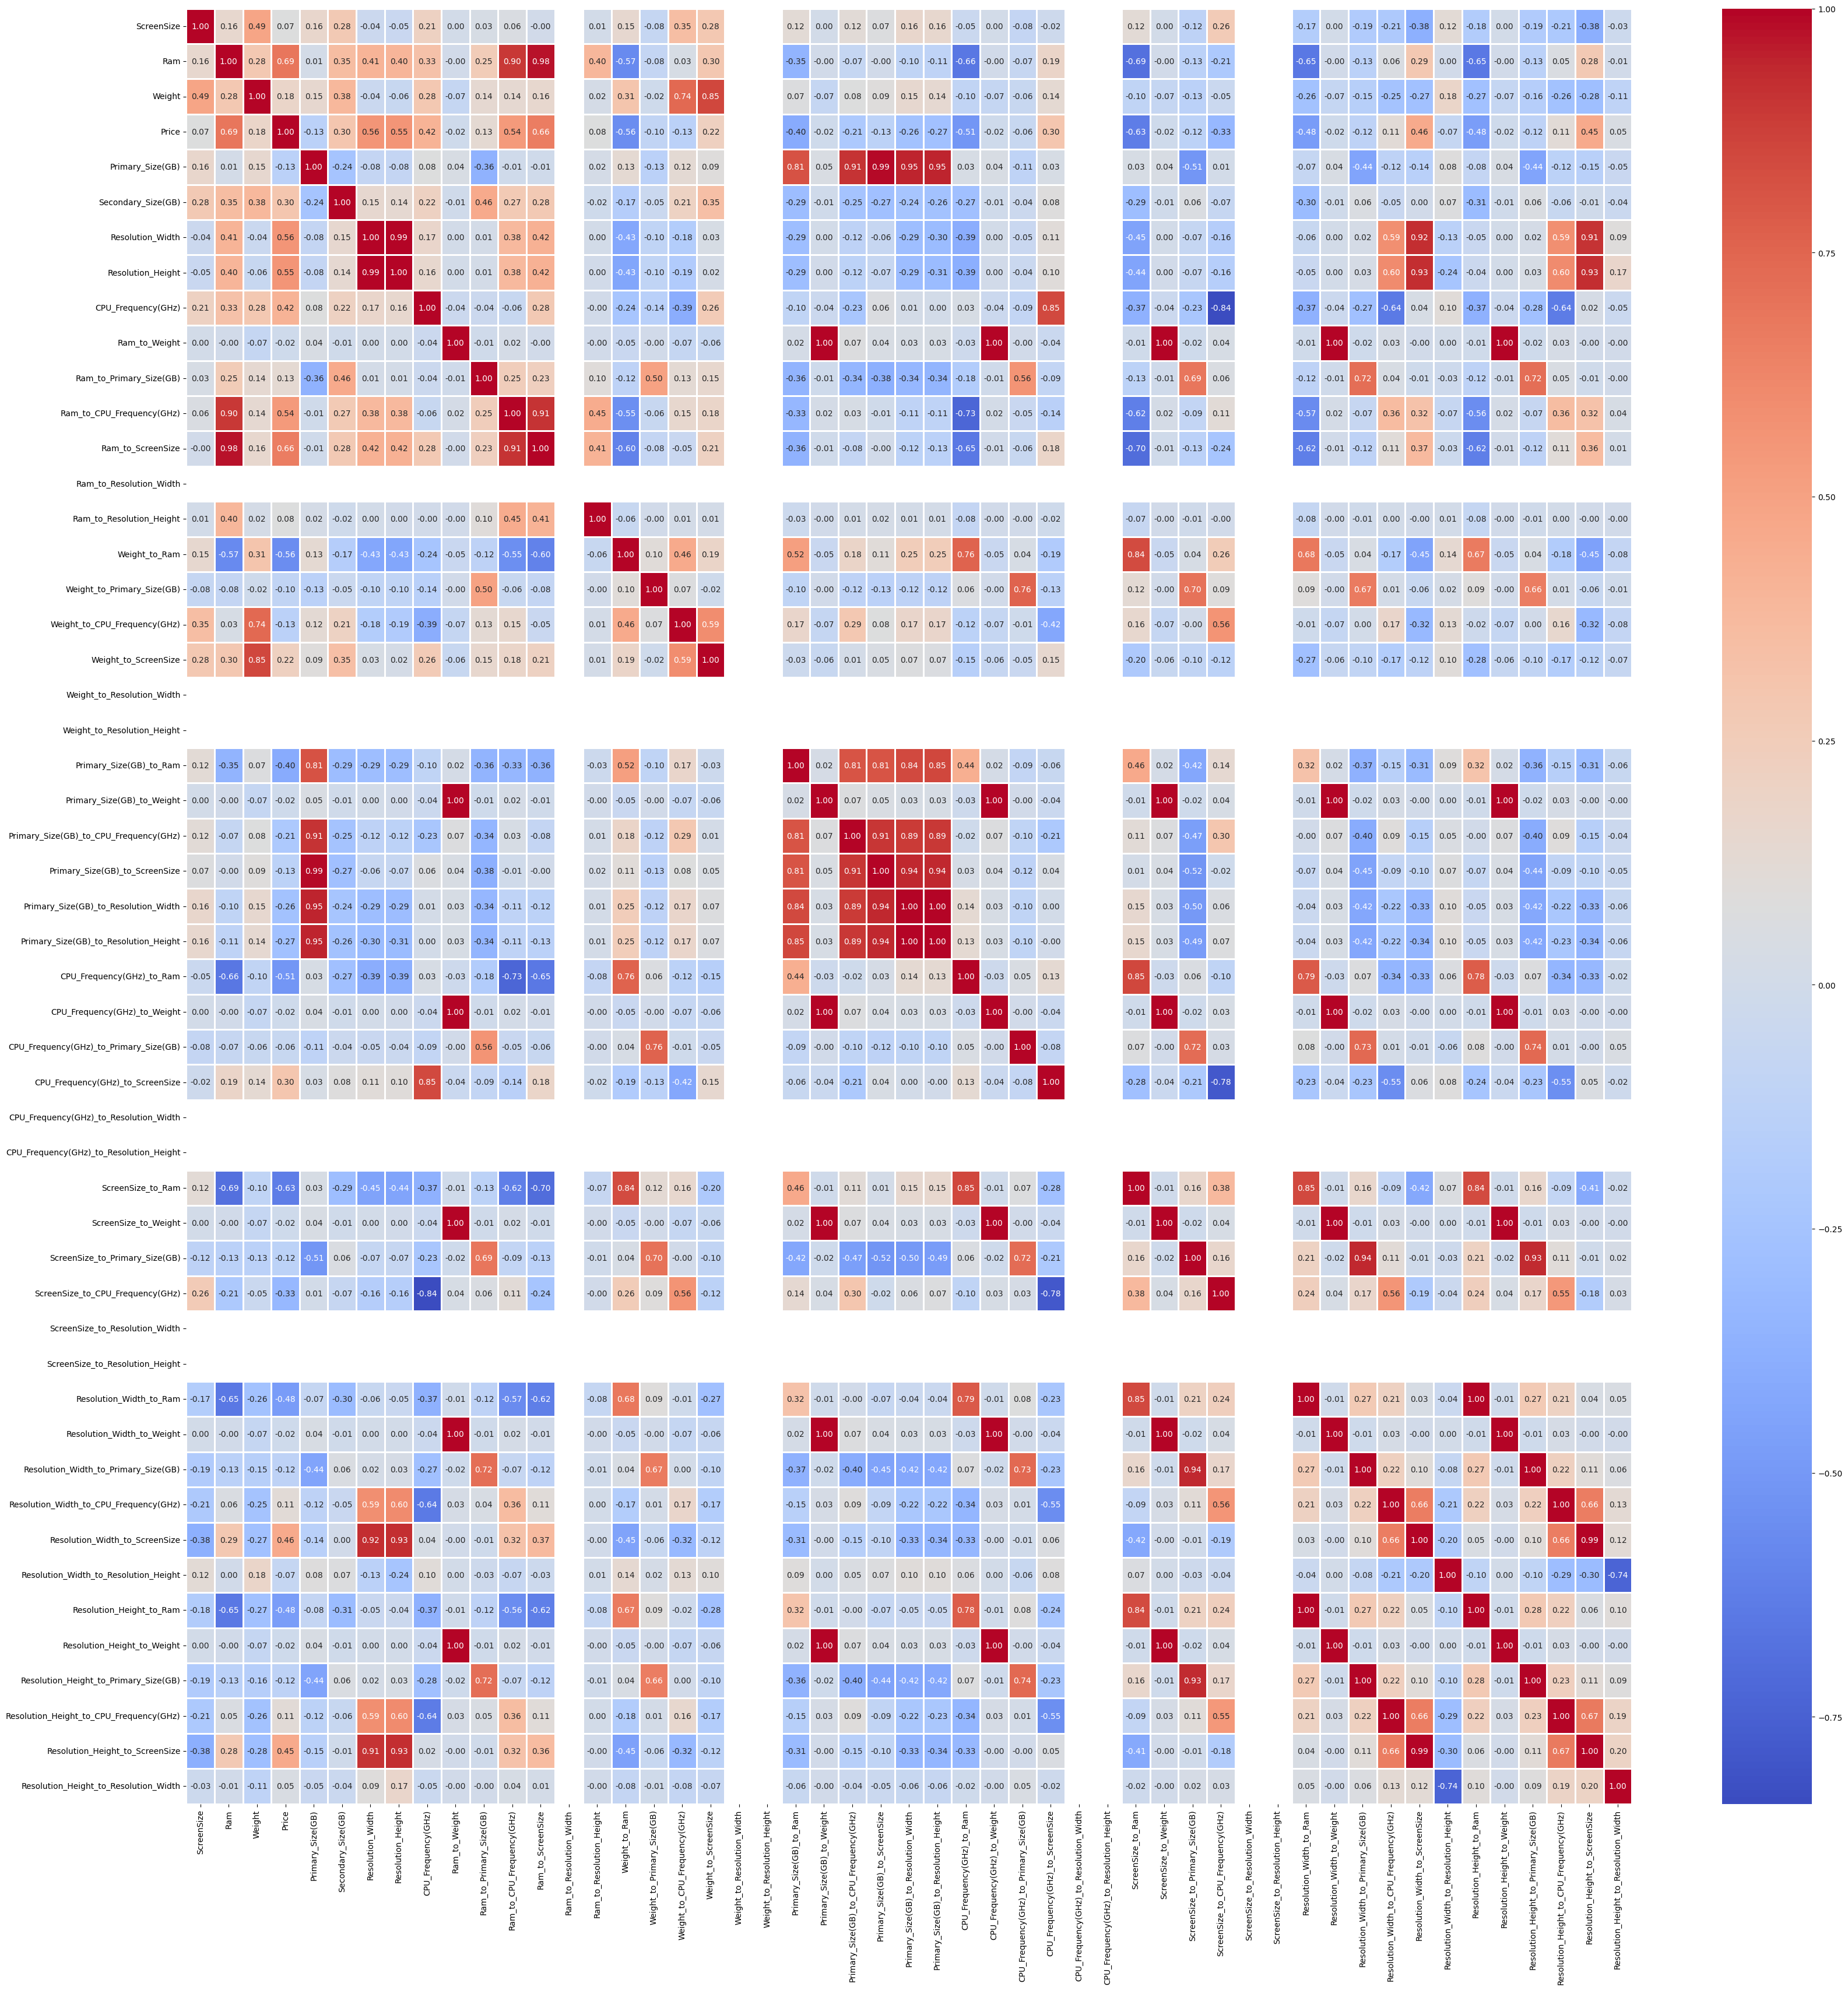

In [36]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])
# Create a heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)

In [37]:
"""# Calculate the first 30th and 70 percentile of "Price column"
Q1 = df["Price"].quantile(0.22)
Q3 = df["Price"].quantile(0.78)
IQR = Q3 - Q1

# Define the lower and upper bound of the data to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]"""

'# Calculate the first 30th and 70 percentile of "Price column"\nQ1 = df["Price"].quantile(0.22)\nQ3 = df["Price"].quantile(0.78)\nIQR = Q3 - Q1\n\n# Define the lower and upper bound of the data to detect outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Remove outliers from the DataFrame\ndf = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]'

This only had negative affect on the models accuracy

In [38]:
df

,Company,TypeName,ScreenSize,Ram,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),...,Resolution_Width_to_Primary_Size(GB),Resolution_Width_to_CPU_Frequency(GHz),Resolution_Width_to_ScreenSize,Resolution_Width_to_Resolution_Height,Resolution_Height_to_Ram,Resolution_Height_to_Weight,Resolution_Height_to_Primary_Size(GB),Resolution_Height_to_CPU_Frequency(GHz),Resolution_Height_to_ScreenSize,Resolution_Height_to_Resolution_Width
0,Apple,Ultrabook,13.0,8.0,macOS,1.37,71378.6832,SSD,None,128.0,...,20.0,1113.0,196.9,1.6,200.0,1167.9,12.5,695.7,123.1,0.6
1,Apple,Ultrabook,13.0,8.0,macOS,1.34,47895.5232,Flash Storage,None,128.0,...,11.2,800.0,110.8,1.6,112.5,671.6,7.0,500.0,69.2,0.6
2,HP,Notebook,15.0,8.0,No OS,1.86,30636.0000,SSD,None,256.0,...,7.5,768.0,128.0,1.8,135.0,580.6,4.2,432.0,72.0,0.6
3,Apple,Ultrabook,15.0,16.0,macOS,1.83,135195.3360,SSD,None,512.0,...,5.6,1066.7,192.0,1.6,112.5,983.6,3.5,666.7,120.0,0.6
4,Apple,Ultrabook,13.0,8.0,macOS,1.37,96095.8080,SSD,None,256.0,...,10.0,825.8,196.9,1.6,200.0,1167.9,6.2,516.1,123.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,4.0,Windows 10,1.80,33992.6400,SSD,None,128.0,...,15.0,768.0,137.1,1.8,270.0,600.0,8.4,432.0,77.1,0.6
1269,Lenovo,2 in 1 Convertible,13.0,16.0,Windows 10,1.30,79866.7200,SSD,None,512.0,...,6.2,1280.0,246.2,1.8,112.5,1384.6,3.5,720.0,138.5,0.6
1270,Lenovo,Notebook,14.0,2.0,Windows 10,1.50,12201.1200,Flash Storage,None,64.0,...,21.3,853.8,97.6,1.8,384.0,512.0,12.0,480.0,54.9,0.6
1271,HP,Notebook,15.0,6.0,Windows 10,2.19,40705.9200,HDD,None,1024.0,...,1.3,546.4,91.1,1.8,128.0,350.7,0.8,307.2,51.2,0.6


<h3>Optimization for machine learning</h3>

In [39]:
# Get columns of the dataframe if needed for further analysis and optimization
df.columns

Index(['Company', 'TypeName', 'ScreenSize', 'Ram', 'OpSys', 'Weight', 'Price',
       'Primary_Storage', 'Secondary_Storage', 'Primary_Size(GB)',
       'Secondary_Size(GB)', 'Resolution_Width', 'Resolution_Height',
       'Panel_type', 'CPU_Brand', 'CPU_Model', 'CPU_Frequency(GHz)',
       'Gpu_Brand', 'Gpu_Model', 'Ram_to_Weight', 'Ram_to_Primary_Size(GB)',
       'Ram_to_CPU_Frequency(GHz)', 'Ram_to_ScreenSize',
       'Ram_to_Resolution_Width', 'Ram_to_Resolution_Height', 'Weight_to_Ram',
       'Weight_to_Primary_Size(GB)', 'Weight_to_CPU_Frequency(GHz)',
       'Weight_to_ScreenSize', 'Weight_to_Resolution_Width',
       'Weight_to_Resolution_Height', 'Primary_Size(GB)_to_Ram',
       'Primary_Size(GB)_to_Weight', 'Primary_Size(GB)_to_CPU_Frequency(GHz)',
       'Primary_Size(GB)_to_ScreenSize',
       'Primary_Size(GB)_to_Resolution_Width',
       'Primary_Size(GB)_to_Resolution_Height', 'CPU_Frequency(GHz)_to_Ram',
       'CPU_Frequency(GHz)_to_Weight',
       'CPU_Frequency(GH

In [40]:
df.head()

,Company,TypeName,ScreenSize,Ram,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),...,Resolution_Width_to_Primary_Size(GB),Resolution_Width_to_CPU_Frequency(GHz),Resolution_Width_to_ScreenSize,Resolution_Width_to_Resolution_Height,Resolution_Height_to_Ram,Resolution_Height_to_Weight,Resolution_Height_to_Primary_Size(GB),Resolution_Height_to_CPU_Frequency(GHz),Resolution_Height_to_ScreenSize,Resolution_Height_to_Resolution_Width
0,Apple,Ultrabook,13.0,8.0,macOS,1.37,71378.6832,SSD,None,128.0,...,20.0,1113.0,196.9,1.6,200.0,1167.9,12.5,695.7,123.1,0.6
1,Apple,Ultrabook,13.0,8.0,macOS,1.34,47895.5232,Flash Storage,None,128.0,...,11.2,800.0,110.8,1.6,112.5,671.6,7.0,500.0,69.2,0.6
2,HP,Notebook,15.0,8.0,No OS,1.86,30636.0000,SSD,None,256.0,...,7.5,768.0,128.0,1.8,135.0,580.6,4.2,432.0,72.0,0.6
3,Apple,Ultrabook,15.0,16.0,macOS,1.83,135195.3360,SSD,None,512.0,...,5.6,1066.7,192.0,1.6,112.5,983.6,3.5,666.7,120.0,0.6
4,Apple,Ultrabook,13.0,8.0,macOS,1.37,96095.8080,SSD,None,256.0,...,10.0,825.8,196.9,1.6,200.0,1167.9,6.2,516.1,123.1,0.6


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1272
Data columns (total 61 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Company                                  1270 non-null   object 
 1   TypeName                                 1270 non-null   object 
 2   ScreenSize                               1270 non-null   float64
 3   Ram                                      1270 non-null   float64
 4   OpSys                                    1270 non-null   object 
 5   Weight                                   1270 non-null   float64
 6   Price                                    1270 non-null   float64
 7   Primary_Storage                          1270 non-null   object 
 8   Secondary_Storage                        1270 non-null   object 
 9   Primary_Size(GB)                         1270 non-null   float64
 10  Secondary_Size(GB)                       1270 non-nul

In [42]:
df

,Company,TypeName,ScreenSize,Ram,OpSys,Weight,Price,Primary_Storage,Secondary_Storage,Primary_Size(GB),...,Resolution_Width_to_Primary_Size(GB),Resolution_Width_to_CPU_Frequency(GHz),Resolution_Width_to_ScreenSize,Resolution_Width_to_Resolution_Height,Resolution_Height_to_Ram,Resolution_Height_to_Weight,Resolution_Height_to_Primary_Size(GB),Resolution_Height_to_CPU_Frequency(GHz),Resolution_Height_to_ScreenSize,Resolution_Height_to_Resolution_Width
0,Apple,Ultrabook,13.0,8.0,macOS,1.37,71378.6832,SSD,None,128.0,...,20.0,1113.0,196.9,1.6,200.0,1167.9,12.5,695.7,123.1,0.6
1,Apple,Ultrabook,13.0,8.0,macOS,1.34,47895.5232,Flash Storage,None,128.0,...,11.2,800.0,110.8,1.6,112.5,671.6,7.0,500.0,69.2,0.6
2,HP,Notebook,15.0,8.0,No OS,1.86,30636.0000,SSD,None,256.0,...,7.5,768.0,128.0,1.8,135.0,580.6,4.2,432.0,72.0,0.6
3,Apple,Ultrabook,15.0,16.0,macOS,1.83,135195.3360,SSD,None,512.0,...,5.6,1066.7,192.0,1.6,112.5,983.6,3.5,666.7,120.0,0.6
4,Apple,Ultrabook,13.0,8.0,macOS,1.37,96095.8080,SSD,None,256.0,...,10.0,825.8,196.9,1.6,200.0,1167.9,6.2,516.1,123.1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14.0,4.0,Windows 10,1.80,33992.6400,SSD,None,128.0,...,15.0,768.0,137.1,1.8,270.0,600.0,8.4,432.0,77.1,0.6
1269,Lenovo,2 in 1 Convertible,13.0,16.0,Windows 10,1.30,79866.7200,SSD,None,512.0,...,6.2,1280.0,246.2,1.8,112.5,1384.6,3.5,720.0,138.5,0.6
1270,Lenovo,Notebook,14.0,2.0,Windows 10,1.50,12201.1200,Flash Storage,None,64.0,...,21.3,853.8,97.6,1.8,384.0,512.0,12.0,480.0,54.9,0.6
1271,HP,Notebook,15.0,6.0,Windows 10,2.19,40705.9200,HDD,None,1024.0,...,1.3,546.4,91.1,1.8,128.0,350.7,0.8,307.2,51.2,0.6


In [43]:
"""# this makes multiple columns with the variable (Separate for yes/no)
variables = ['Company', 'TypeName', 'ScreenSize', 'Ram', 'OpSys', 'Weight',
       'Primary_Storage', 'Secondary_Storage','Primary_Size(GB)',
       'Secondary_Size(GB)', 'Resolution_Width', 'Resolution_Height',
       'Panel_type', 'CPU_Brand', 'CPU_Model', 'CPU_Frequency(GHz)',
       'Gpu_Brand', 'Gpu_Model', 'Ram_to_Weight', 'Primary_Size(GB)_to_Weight',
       'Cpu Frequency(GHz)_to_Weight', 'ScreenSize_to_Weight',
       'Ram_to_ScreenSize', 'ScreenSize_to_Resolution_Width',
       'Ram_to_Resolution_Width', 'Primary_Storage(GB)_to_CPU_Frequency(GHz)',
       'Primary_Size(GB)_to_Resolution_Width']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)"""

'# this makes multiple columns with the variable (Separate for yes/no)\nvariables = [\'Company\', \'TypeName\', \'ScreenSize\', \'Ram\', \'OpSys\', \'Weight\',\n       \'Primary_Storage\', \'Secondary_Storage\',\'Primary_Size(GB)\',\n       \'Secondary_Size(GB)\', \'Resolution_Width\', \'Resolution_Height\',\n       \'Panel_type\', \'CPU_Brand\', \'CPU_Model\', \'CPU_Frequency(GHz)\',\n       \'Gpu_Brand\', \'Gpu_Model\', \'Ram_to_Weight\', \'Primary_Size(GB)_to_Weight\',\n       \'Cpu Frequency(GHz)_to_Weight\', \'ScreenSize_to_Weight\',\n       \'Ram_to_ScreenSize\', \'ScreenSize_to_Resolution_Width\',\n       \'Ram_to_Resolution_Width\', \'Primary_Storage(GB)_to_CPU_Frequency(GHz)\',\n       \'Primary_Size(GB)_to_Resolution_Width\']\n\n# use encoder\nencoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")\none_hot_encoded = encoder.fit_transform(df[variables]).astype(int)\ndf = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)'

In [44]:
# List of all boolean variables we want to convert
variables = ['Company', 'TypeName', 'OpSys',
       'Primary_Storage', 'Secondary_Storage',
       'Panel_type', 'CPU_Brand', 'CPU_Model',
       'Gpu_Brand', 'Gpu_Model']

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [45]:
# Create variables, which we are trying to predict, ->
# for the other variable drop the column that we are trying to predict
# for the other variable keep the column that we are trying to predict
X = df.drop(columns=["Price"], axis=1)
y = df["Price"]

In [46]:
# Create trainsplit with sample size 0.3 this means 70% of the data ->
# will be used for training and other 30% for testing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [47]:
# Create an empty linear regression model ->
# which we will fit into our data (start training it with our data)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Get the test predictions of the data into a variable ->
# which we will want to use to compare with the actual values
predictions = model.predict(X_test)

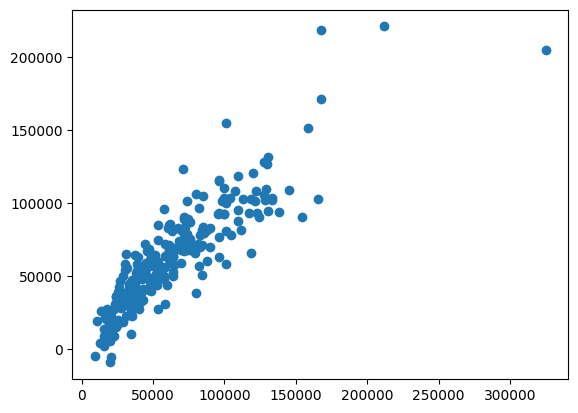

In [49]:
# Plot the predictions against the actual values (compare) to see difference ->
# if these values follow a diagonal line = good predictions
plt.scatter(y_test, predictions)
plt.show()

In [50]:
# Change the units so that they match with your dataset's target variable
# for example, if your model is predicting Centigrades (C), don't use $-signs 
# in the metrics

# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
12991.06 $

MSE
346441441.16 $^2

RMSE:
18612.94 $

R-squared:
0.78


In [51]:
mae_percentage = metrics.mean_absolute_error(y_test, predictions) / df["Price"].mean()
mae_percentage = round(mae_percentage, 2) * 100
print(f"MAE difference in % towards average: {mae_percentage} %")

rmse_percentage = np.sqrt(metrics.mean_squared_error(y_test, predictions)) / df["Price"].mean()
rmse_percentage = round(rmse_percentage, 2) * 100
print(f"RMSE difference in % towards average: {rmse_percentage} %")

MAE difference in % towards average: 22.0 %
RMSE difference in % towards average: 31.0 %


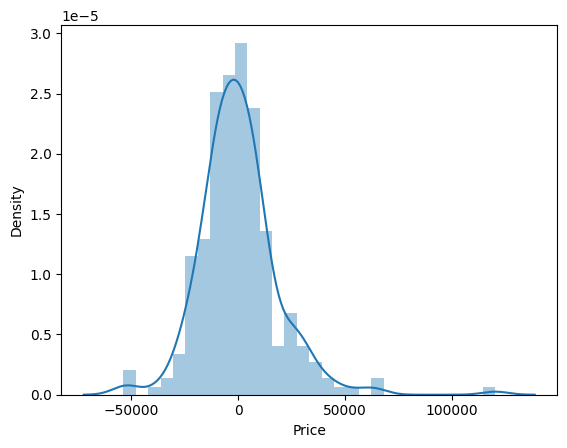

In [52]:
sns.distplot((y_test - predictions))
plt.show()
plt.close()

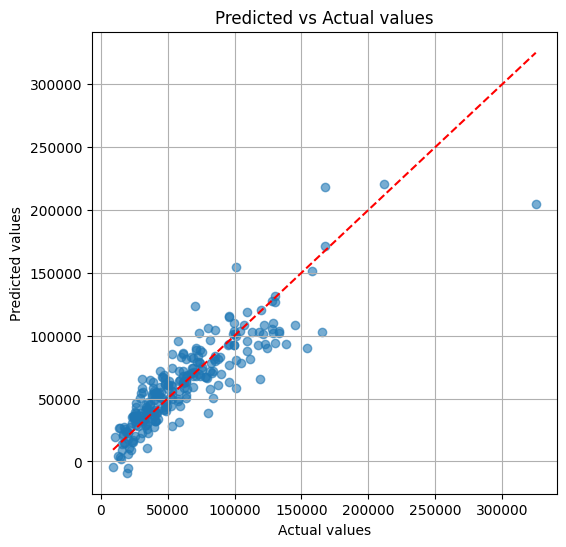

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line y=x
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.grid(True)
plt.show()

In [54]:
# Create variable tester row to test the model with a random row from the DataFrame
tester_row = df.sample(n=1)
print(f"Index: {tester_row.index[0]}")
print(tester_row)

Index: 948
     Company  TypeName  ScreenSize  Ram  OpSys  Weight    Price  \
948       16         3        14.0  8.0      5    1.95  62870.4   

     Primary_Storage  Secondary_Storage  Primary_Size(GB)  ...  \
948                3                  2             256.0  ...   

     Resolution_Width_to_Primary_Size(GB)  \
948                                   7.5   

     Resolution_Width_to_CPU_Frequency(GHz)  Resolution_Width_to_ScreenSize  \
948                                   834.8                           137.1   

     Resolution_Width_to_Resolution_Height  Resolution_Height_to_Ram  \
948                                    1.8                     135.0   

     Resolution_Height_to_Weight  Resolution_Height_to_Primary_Size(GB)  \
948                        553.8                                    4.2   

     Resolution_Height_to_CPU_Frequency(GHz)  Resolution_Height_to_ScreenSize  \
948                                    469.6                             77.1   

     Resolut

In [55]:
# Create variables, which we are trying to predict, ->
# for the other variable drop the column that we are trying to predict
# for the other variable keep the column that we are trying to predict
X_tester_row = tester_row.drop(columns=["Price"])
y_tester_row = tester_row["Price"]

In [56]:
# Make predictions with the model using the tester row
y_pred_tester = model.predict(X_tester_row)

In [57]:
# Get the result of the prediction
result = model.predict(X_tester_row)[0]

# Display the predicted price for the tester row
print()
print(f"Predicted computers price with given parameters:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted computers price with given parameters:
60514.98 $
----------------


In [58]:
# Get the price of the tester row to compare with the predicted price
row = df.loc[tester_row.index[0]]

# Display the actual price of the tester row
row["Price"]

np.float64(62870.4)

In [59]:
# Calculate the precision of the model by comparing the predicted price with the actual price
precision = result/row["Price"]

# Display the precision of the model by percentages
precision

np.float64(0.9625352653376675)

In [60]:
# Calculate how much the model is off by $
precision_in_money = round(row["Price"] - result, 2)

# Display how much the model was off by $
precision_in_money

np.float64(2355.42)

In [ ]:
# Create variable tester row to test the model with a random row from the DataFrame
tester_row = df.sample(n=1)
print(f"Index: {tester_row.index[0]}")
print(tester_row)